# Skript: Bubblechart, 3D Scatterplot, Surfaceplot

---

Heute geht es um speziellere Diagrammtypen. Bubblecharts, 3D Scatterplots und Surfaceplots eignen sich alle, um den Zusammenhang von drei oder mehreren Variablen darzustellen. Sie erweitern den Scatterplot um eine zusätzliche Dimension (Markergröße / z-Achse).

3D-Plots lassen sich, einmal als Bild abgespeichert, nicht mehr drehen und sollten daher vermieden werden oder nur in interaktivem Kontext eingesetzt werden. Um 3D-Plots zu erstellen, muss die "Projektion" in Matplotlib verändert werden.

Mit einem ähnlichen Konzept arbeitet der "Radar Chart" - ein kreisförmiges Liniendiagramm. Auch hier muss die Achsenprojektion verändert werden.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bubblechart

---

Koppelt die Markergröße eines Scatterplots an eine numerische Variable.

In [2]:
# Wir starten mit einem Scatterplot
taxi = sns.load_dataset("taxis")
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


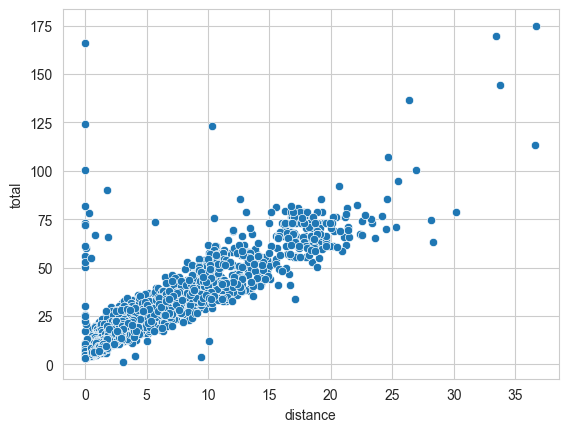

In [3]:
sns.scatterplot(taxi,
				x="distance",
				y="total");

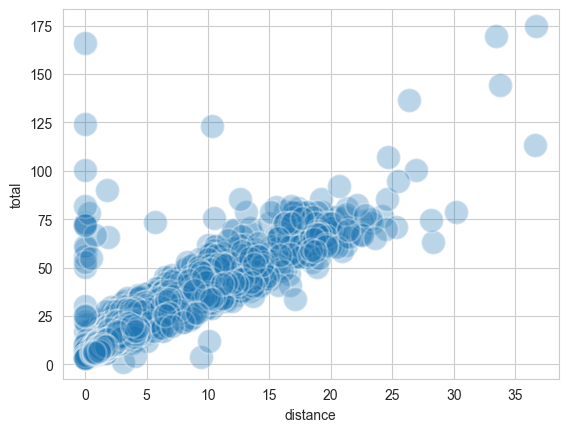

In [4]:
# Einstellung der Größe der Punkte über s

# s ist gar nicht in der Dokumentation vom sns scatterplot vermerkt?
# Hintergrund: wird an Matplotlibs scatter weitergereicht:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter
sns.scatterplot(taxi,
				x="distance",
				y="total",
				s=300,
				alpha=0.3);

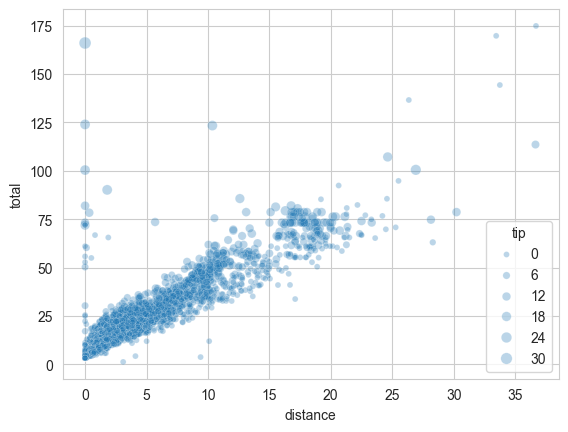

In [5]:
# Größe an Variable koppeln
sns.scatterplot(taxi,
				x="distance",
				y="total",
				alpha=0.3,
				size="tip");

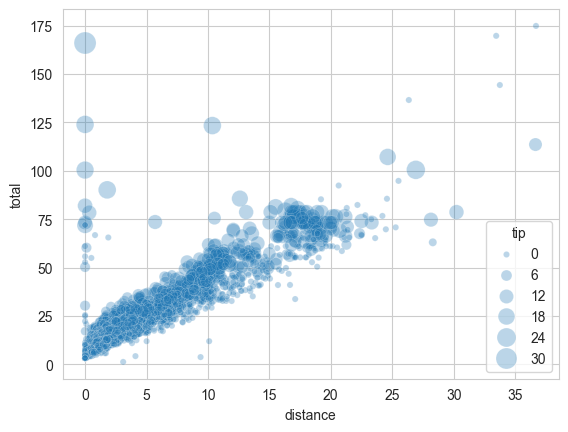

In [6]:
# Größenskalierung anpassen
sns.scatterplot(taxi,
				x="distance",
				y="total",
				alpha=0.3,
				size="tip",
				sizes=(20, 250));

### Praxisbeispiel: gapminder-Datensatz

In [6]:
gapminder_full = pd.read_csv("gapminder_full.csv")
gapminder_full.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [7]:
# Was ist das letzte Jahr im Datensatz?
gapminder_full["year"].max()

np.int64(2007)

In [8]:
# Kopie der Daten nur des letzten Jahres
gapminder2007 = gapminder_full[gapminder_full["year"] == 2007].copy()

gapminder2007.sort_values(by="population",
						  ascending=False,
						  inplace=True)
gapminder2007.head()

,country,year,population,continent,life_exp,gdp_cap
299,China,2007,1318683096,Asia,72.961,4959.114854
707,India,2007,1110396331,Asia,64.698,2452.210407
1619,United States,2007,301139947,Americas,78.242,42951.653090
719,Indonesia,2007,223547000,Asia,70.650,3540.651564
179,Brazil,2007,190010647,Americas,72.390,9065.800825


In [9]:
# Welche Kontinente sind enthalten?
gapminder2007["continent"].unique()

array(['Asia', 'Americas', 'Africa', 'Europe', 'Oceania'], dtype=object)

In [10]:
# Kontinenten Farbe zuordnen
continent_colors = {"Asia": "green",
					"Europe": "blue",
					"Africa": "orange",
					"Americas": "red",
					"Oceania": "black"}

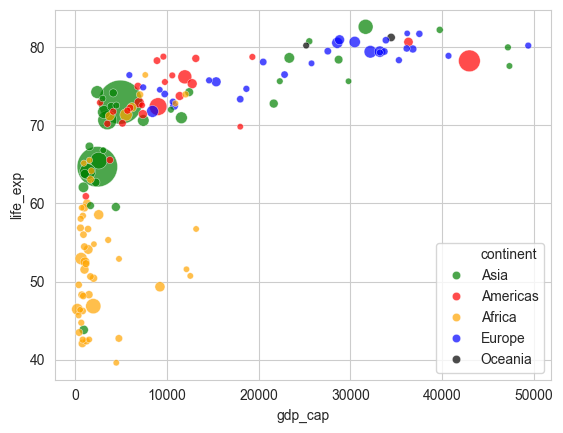

In [11]:
ax = sns.scatterplot(gapminder2007,
					 y="life_exp",
					 x="gdp_cap",
					 hue="continent",
					 palette=continent_colors,
					 size="population",
					 sizes=(20, 1000),
					 alpha=0.7)

h, l = ax.get_legend_handles_labels()
ax.legend(labels=l[:6],
		  handles=h[:6]);

In [12]:
l

['continent',
 'Asia',
 'Americas',
 'Africa',
 'Europe',
 'Oceania',
 'population',
 '250000000',
 '500000000',
 '750000000',
 '1000000000',
 '1250000000']

In [13]:
gapminder2007["population"].max()

np.int64(1318683096)

In [14]:
gapminder2007["population"].min()

np.int64(199579)

# 2. 3D-Scatterplot

---

Achtung, diese Visualisierungen sind mit Matplotlib nur interaktiv, wenn man sie als Skript ausführt und in einem extra Fenster darstellt. Im Jupyter-Notebook werden 3D-Plots statisch angezeigt.

In [12]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


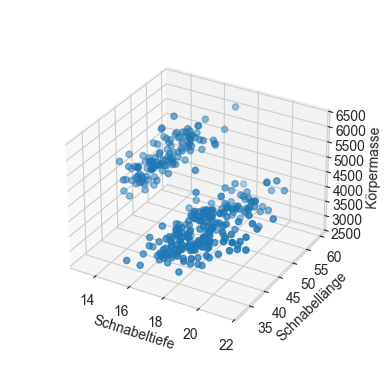

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(data=penguins,
		   xs="bill_depth_mm",
		   ys="bill_length_mm",
		   zs="body_mass_g")

ax.set(xlabel="Schnabeltiefe",
	   ylabel="Schnabellänge",
	   zlabel="Körpermasse")

ax.set_box_aspect(aspect=None, zoom=0.8)

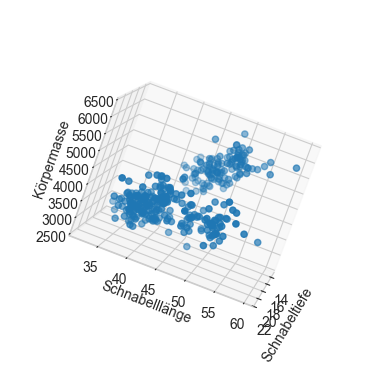

In [16]:
# Würfel rotieren
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(data=penguins,
		   xs="bill_depth_mm",
		   ys="bill_length_mm",
		   zs="body_mass_g")

ax.set(xlabel="Schnabeltiefe",
	   ylabel="Schnabelllänge",
	   zlabel="Körpermasse")
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.view_init(elev=10, azim=5, roll=-20)
# elev dreht Würfel auf der "linken" Ebene (Rotation um "bill_length_mm)
# azim dreht Würfel auf der "horizontalen" Ebene (Rotation um "body_mass_g")
# roll drehte Würfel an der "hinteren" Ebene (Rotation um "bill_depth_mm")

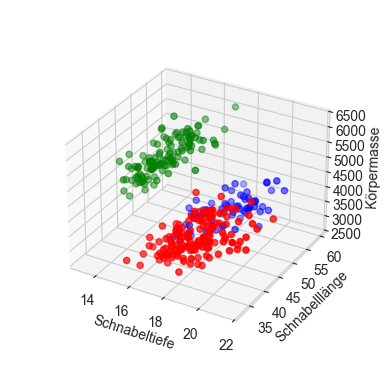

In [18]:
# Jetzt mit Einfärbung
species_colors = {"Adelie": "red",
				  "Chinstrap": "blue",
				  "Gentoo": "green"}

colors = [species_colors[species] for species in penguins["species"]]

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(data=penguins,
		   xs="bill_depth_mm",
		   ys="bill_length_mm",
		   zs="body_mass_g",
		   c=colors)

ax.set(xlabel="Schnabeltiefe",
	   ylabel="Schnabelllänge",
	   zlabel="Körpermasse")

ax.set_box_aspect(aspect=None, zoom=0.8)

## Übungsaufgabe

Erstelle die folgende Grafik (seaborn dataset "car_crashes"):

![image.png](1_3d_scatterplot.png)
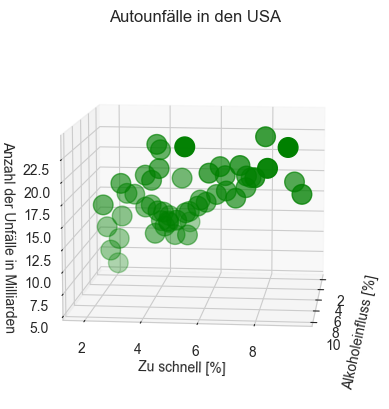

In [22]:
car_crashes = sns.load_dataset("car_crashes")
car_crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


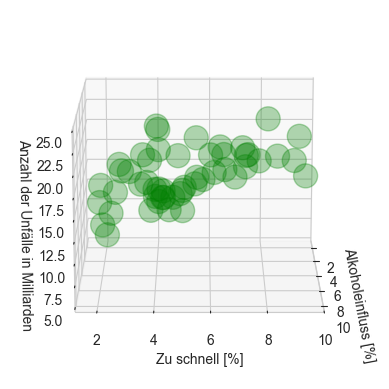

In [99]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(
	data=car_crashes,
	zs="total",
	ys="speeding",
	xs="alcohol",
	s=300,
	alpha=0.3,
	c="green"
)

ax.set(xlabel="Alkoholeinfluss [%]",
	   ylabel="Zu schnell [%]",
	   zlabel="Anzahl der Unfälle in Milliarden")

ax.set_box_aspect(aspect=None, zoom=1.0)
ax.view_init(elev=15, azim=0, roll=0)

# 3. Surfaceplot / Oberflächendiagramm

Oberflächendiagramme haben eher eine kleine Nische in der Anwendung. Sie eignen sich z.B., um Funktionen in drei Dimensionen nachzuvollziehen. Wichtig ist bei Oberflächenplots ein gleichmäßiges Koordinatengitter (X, Y) mit jeweils einem z-Wert pro Koordinate. Eine nützliche Funktion dafür ist `np.meshgrid`. Wir werden im Folgenden mit künstlich erstellten Daten arbeiten.

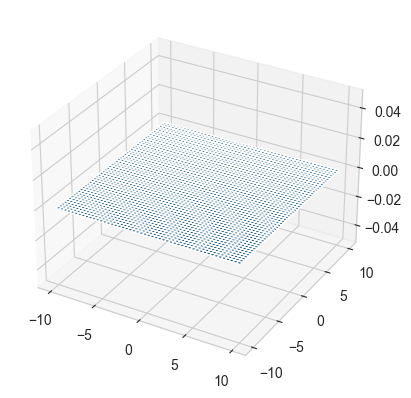

In [101]:
# Fläche, die bei z auf der Null liegt
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Daten und Fläche erstellen:
X = np.arange(-10, 10, 0.01)
Y = np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(X, Y)
Z = 0 * X
# Oberfläche abbilden:
ax.plot_surface(X, Y, Z);

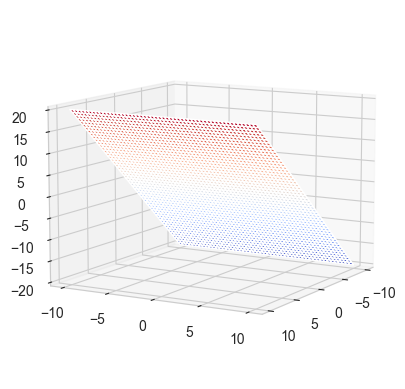

In [103]:
# Fläche, die eine Steigung hat
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Daten und Fläche erstellen:
X = np.arange(-10, 10, 0.01)
Y = np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(X, Y)
Z = 2 * X

# Oberfläche abbilden:
ax.plot_surface(X, Y, Z,
				cmap="coolwarm",
				)

ax.view_init(elev=10, azim=30, roll=0)

Fazit:
Wir schwimmen jetzt schon weiter und weiter weg von einfachen Plots, die nur in Seaborn erstellt werden und kommen mehr und mehr an in Plots, die aus einem wilden Gemisch von Seaborn und Matplotlib erstellt werden. Die heutigen Beispiele sind dabei nur eine kleine Vorausschau auf komplexe grafische Methoden.

Lust auf fortgeschritte Diagramme mit Python? Lasst uns kennenlernen:
[Hier](https://www.python-graph-gallery.com/)

## Übung

Besuche die oben erwähnte Seite und wähle dir eine der verschiedenen Optionen zur Darstellung von Distribution, Correlation, Ranking, Flow oder Part Of A Whole aus, führe das Beispiel durch und entdecke die darin genutzten grafischen Optionen. Bereite damit eine Code-Präsentation vor, in welcher du jeden der Bestandteile der Formel beschreibst und die Grafik insgesamt vorstellst.

Achtung: Bitte NICHT die Bereiche Map oder Animation/Interactivity/3D angreifen, diese wollen wir mit Python und Dash in der nächsten Woche näher kennenlernen.



In [106]:
# install in Terminal
# pip install circlify

# import
import circlify

In [104]:
# data example

data = [{'id': 'World', 'datum': 6964195249, 'children': [
	{'id': "North America", 'datum': 450448697,
	 'children': [
		 {'id': "United States", 'datum': 308865000},
		 {'id': "Mexico", 'datum': 107550697},
		 {'id': "Canada", 'datum': 34033000}
	 ]},
	{'id': "South America", 'datum': 278095425,
	 'children': [
		 {'id': "Brazil", 'datum': 192612000},
		 {'id': "Colombia", 'datum': 45349000},
		 {'id': "Argentina", 'datum': 40134425}
	 ]},
	{'id': "Europe", 'datum': 209246682,
	 'children': [
		 {'id': "Germany", 'datum': 81757600},
		 {'id': "France", 'datum': 65447374},
		 {'id': "United Kingdom", 'datum': 62041708}
	 ]},
	{'id': "Africa", 'datum': 311929000,
	 'children': [
		 {'id': "Nigeria", 'datum': 154729000},
		 {'id': "Ethiopia", 'datum': 79221000},
		 {'id': "Egypt", 'datum': 77979000}
	 ]},
	{'id': "Asia", 'datum': 2745929500,
	 'children': [
		 {'id': "China", 'datum': 1336335000},
		 {'id': "India", 'datum': 1178225000},
		 {'id': "Indonesia", 'datum': 231369500}
	 ]}
]}]

In [110]:
# circle positions

circles = circlify.circlify(
	data,
	show_enclosure=False,
	target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

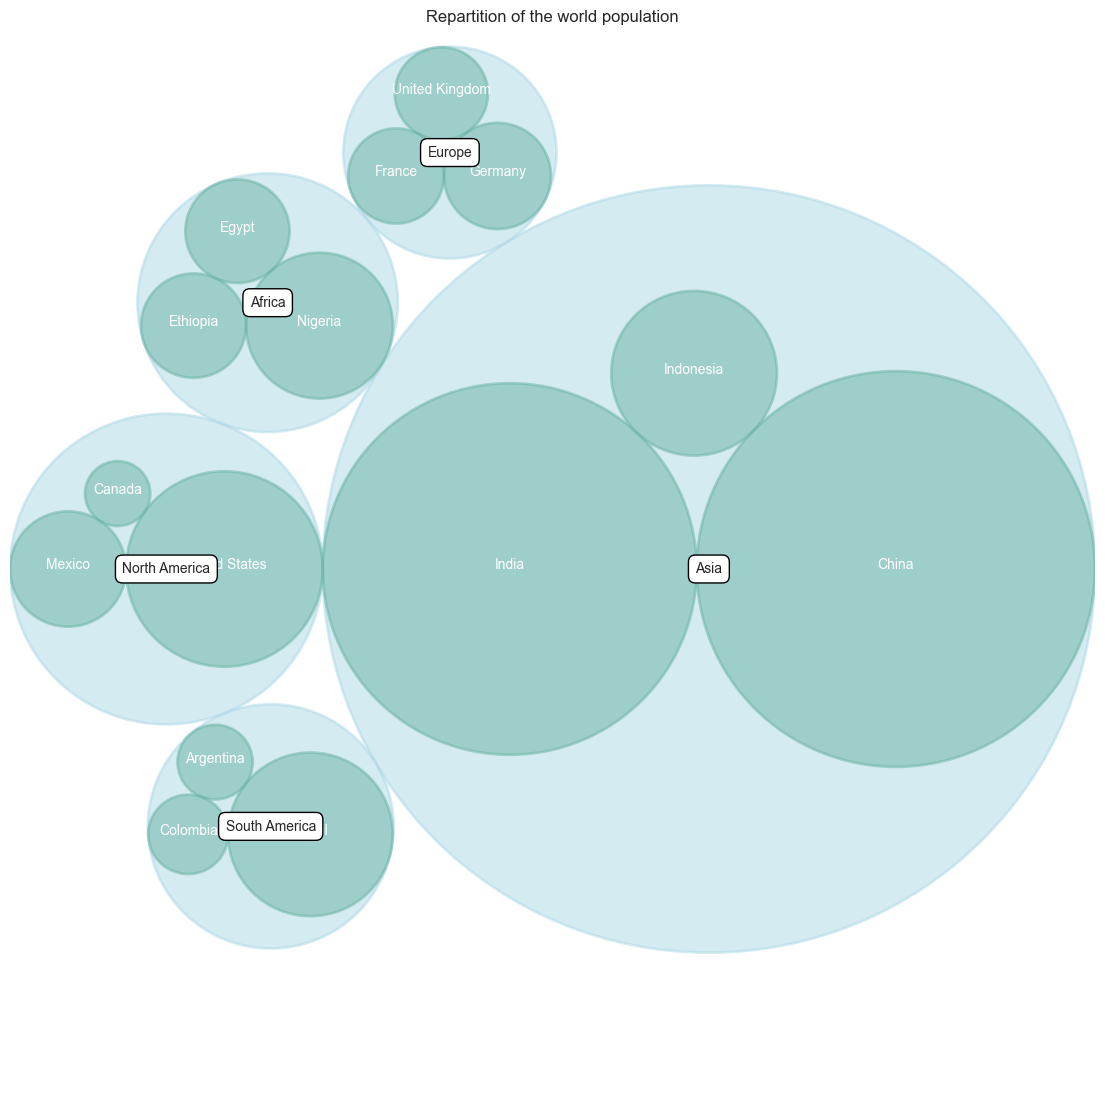

In [109]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14, 14))

# Title
ax.set_title('Repartition of the world population')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
	max(
		abs(circle.x) + circle.r,
		abs(circle.y) + circle.r,
	)
	for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
	if circle.level != 2:
		continue
	x, y, r = circle
	ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
							linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
	if circle.level != 3:
		continue
	x, y, r = circle
	label = circle.ex["id"]
	ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
							linewidth=2, color="#69b3a2"))
	plt.annotate(label, (x, y), ha='center', color="white")

# Print labels for the continents
for circle in circles:
	if circle.level != 2:
		continue
	x, y, r = circle
	label = circle.ex["id"]
	plt.annotate(label, (x, y), va='center', ha='center', bbox=dict(
		facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

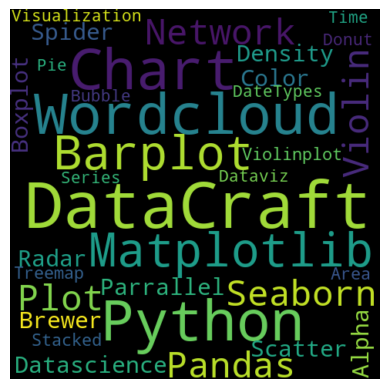

In [134]:
# imports
from wordcloud import WordCloud

# Create a list of word
text = ("""DataCraft DataCraft DataCraft DataCraft Python Python Python Matplotlib Matplotlib Seaborn
      Network Plot Violin Chart Pandas Datascience Wordcloud
      Spider Radar Parrallel Alpha Color Brewer Density Scatter
      Barplot Barplot Boxplot Violinplot Treemap Stacked Area
      Chart Chart Visualization Dataviz Donut Pie Time-Series
      Wordcloud Wordcloud DateTypes Bubble""")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)